# Pymaceuticals Inc.
---

### Analysis

- 
- Based on the box plot shown below, Capomulin and Ramicane reduce the size of tumors better compared to Ceftimin and Infubinol
- There is a strong positive correlation of 0.84 between mouse weight and average tumor volume. This shows that when the wright of the mouse increases the aver tumor volume does as well.
- The regression analysis shows an r-squared value of .709. This means that around 71% of the model fit the data, which means it is a fairly accurate model.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sn
from scipy.stats import linregress
from matplotlib.pyplot import figure
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mice = len(combined_data['Mouse ID'].value_counts())
mice

249

In [21]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_data.loc[combined_data['Mouse ID'] == 'g989', :]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
new_mice = len(df['Mouse ID'].value_counts())
new_mice

248

## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_mean = df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
print(drug_mean)
drug_median = df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
print(drug_median)
drug_variance = df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
print(drug_variance)
drug_std = df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
print(drug_std)
drug_sem = df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
drug_sem

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Pro

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_table = pd.DataFrame({"Mean": drug_mean,
                              "Median": drug_median,
                              "Variance": drug_variance,
                              "Standard Deviation": drug_std,
                              "SEM": drug_sem})
summary_table



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [53]:
# Using the aggregation method, produce the same summary statistics in a single line.
summary_table_two = df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_table_two

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64


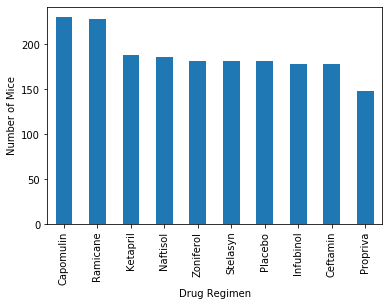

In [55]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_count = df['Drug Regimen'].value_counts()
print(mice_count)
plot = mice_count.plot.bar()
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

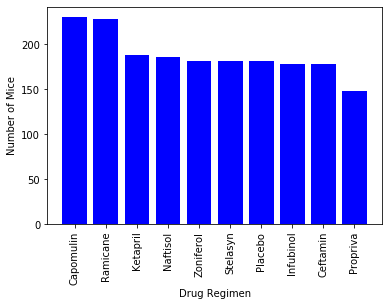

In [57]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values
plt.bar(x_axis, y_axis, color='blue', align='center')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.xticks(rotation='vertical')
plt.show

Male      958
Female    922
Name: Sex, dtype: int64


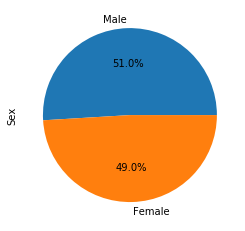

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = df['Sex'].value_counts()
print(gender_count)
gender_count.plot.pie(autopct= "%1.1f%%")
plt.show()

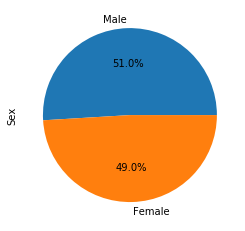

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_count.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [108]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = combined_data.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_merged = last_timepoint.merge(combined_data, on=["Mouse ID", "Timepoint"], how="left")
last_timepoint_merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [110]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = last_timepoint_merged.loc[last_timepoint_merged['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"For {drug}, the outliers are: {outliers}")

For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


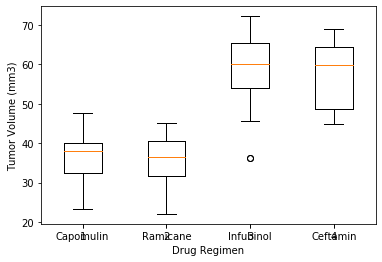

In [126]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.boxplot(boxplot_list)
ax1.boxplot(tumor_vol_data, labels=treatments)
plt.show()
    

## Line and Scatter Plots

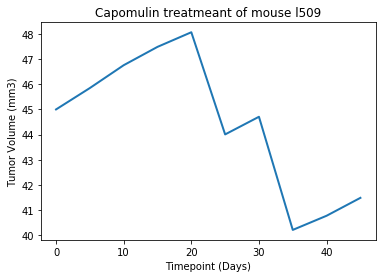

In [127]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = Capomulin.loc[Capomulin["Mouse ID"] == "l509",:]
line_df.head()
x_axis = line_df["Timepoint"]
tumor_size = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumor_size,linewidth=2, markersize=15, label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


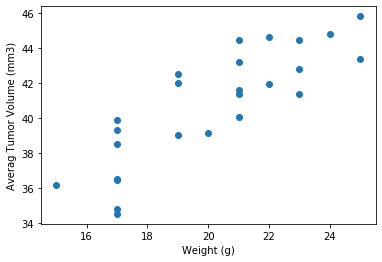

In [128]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capomulin_vol = Capomulin.groupby(['Mouse ID']).mean()

plt.scatter(avg_capomulin_vol['Weight (g)'], avg_capomulin_vol['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [98]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_capomulin_vol['Weight (g)'],avg_capomulin_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


The correlation between mouse weight and the average tumor volume is 0.84


The r-squared is: 0.709


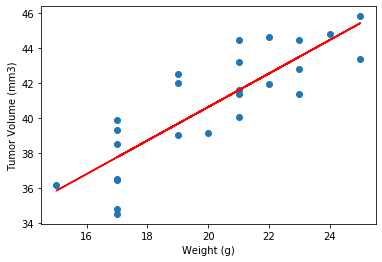

In [129]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_capomulin_vol["Weight (g)"],avg_capomulin_vol["Tumor Volume (mm3)"])
regress_values=avg_capomulin_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_capomulin_vol["Weight (g)"],avg_capomulin_vol["Tumor Volume (mm3)"])
plt.plot(avg_capomulin_vol["Weight (g)"], regress_values, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()